<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/sklearn/bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning using Bayes

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
plt.xkcd()

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn
sklearn.__version__

'0.21.2'

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-1500.csv', sep=';')

In [4]:
df.head()

,speed,age,miles,group
0,98.0,44.0,25.0,1
1,118.0,54.0,24.0,1
2,111.0,26.0,34.0,0
3,97.0,25.0,10.0,2
4,114.0,38.0,22.0,1


In [5]:
df.describe()

,speed,age,miles,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.980667,30.434000,0.998667
std,17.604333,17.130400,15.250815,0.816768
min,68.000000,16.000000,1.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,100.000000,84.000000,2.000000


In [6]:
y=df['group']

In [7]:
df.drop('group', axis='columns', inplace=True)

In [8]:
X = df.as_matrix()

### We restrict ourselves to two dimensions for now

Because this is all we really can visualize in 2d

In [9]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# http://jponttuset.cat/xkcd-deep-learning/

from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

# https://matplotlib.org/users/colormaps.html
# https://matplotlib.org/gallery/images_contours_and_fields/contourf_demo.html#sphx-glr-gallery-images-contours-and-fields-contourf-demo-py
cmap = ListedColormap(['#FF0000', '#0000FF', '#FFFF00'])

font_size=25
title_font_size=40

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
#     x_min, x_max = 0, 500
#     y_min, y_max = 0, 500
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   size=(15, 8), n_samples=300):
    xx,yy = meshGrid(x_data, y_data)
    fig, ax = plt.subplots(figsize=size)

    if clf:
        Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])

        probaZ = Z.max(axis=1)
        probaZ = probaZ.reshape(xx.shape)
        ax.contourf(xx, yy, probaZ, cmap=plt.cm.binary, alpha=.4)

        Z = Z.argmax(axis=1)
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cmap, alpha=.3)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    samples = pd.DataFrame(np.array([x_data, y_data, ground_truth]).T).sample(n_samples, random_state=42)
    classes = samples[2]
    scatter = ax.scatter(samples[0], samples[1], c=classes, cmap=cmap, s=100, marker='o', edgecolors='k')

    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label, fontsize=font_size)
    ax.set_title(title, fontsize=title_font_size)

    # https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_with_legend.html
    formatter = FuncFormatter(lambda s,t: "Many Accidents" if s == 0 else "No Accidents" if s == 1 else "Few Accidents")
    legend = ax.legend(*scatter.legend_elements(alpha=0.6, prop='colors', fmt=formatter), title="Classes")
    ax.add_artist(legend)
    
    return ax, scatter


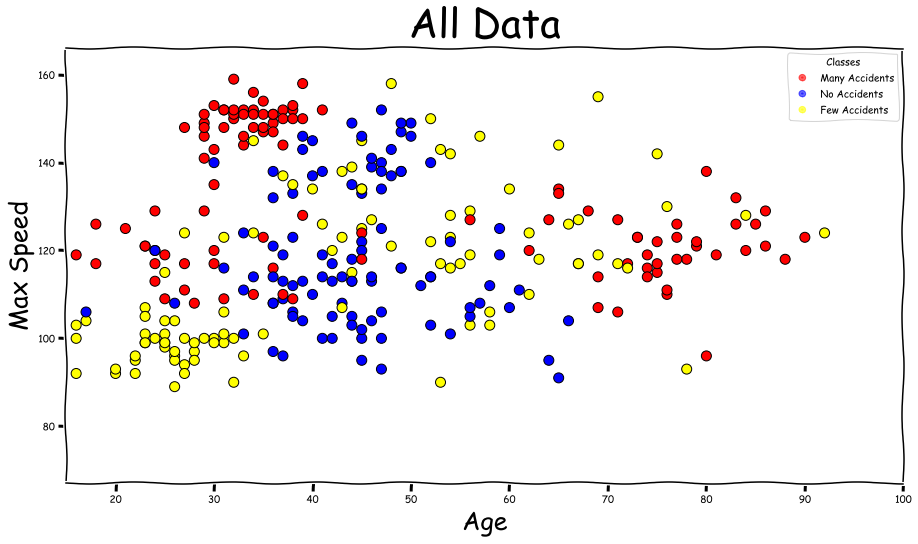

In [10]:
ax, scatter = plotPrediction(None, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="All Data")

<img src='img/clf_comp.png'>


https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

https://scikit-learn.org/stable/supervised_learning.html

https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html


In [11]:
%%time
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
clf = GaussianNB()
clf.fit(X[:, :2], y)

Wall time: 478 ms


In [12]:
input = [[100.0, 48.0]]
clf.predict_proba(input)

array([[0.0915451, 0.5734444, 0.3350105]])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1200, 3), (1200,), (300, 3), (300,))

In [14]:
X_train_2_dim = X_train[:, :2]
X_test_2_dim = X_test[:, :2]

(<matplotlib.axes._subplots.AxesSubplot at 0x1eb288ab748>,
 <matplotlib.collections.PathCollection at 0x1eb28371d68>)

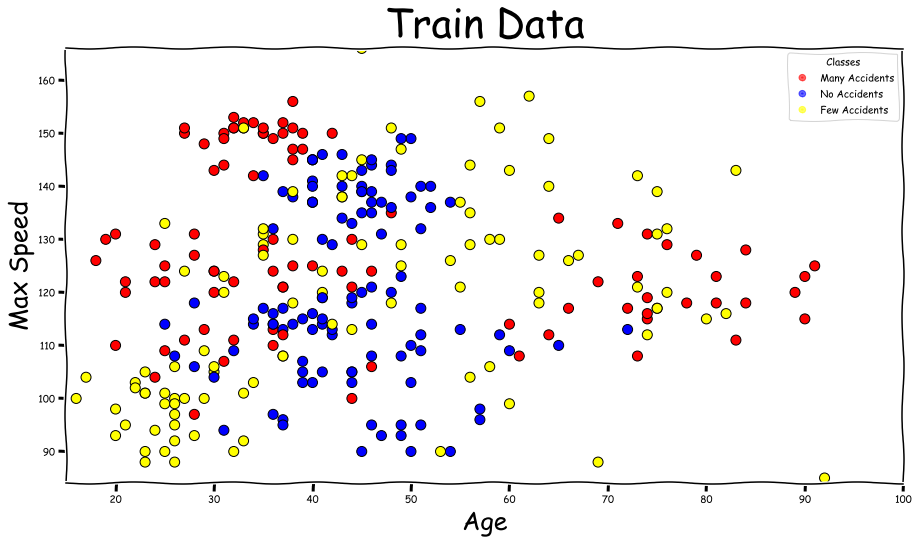

In [15]:
plotPrediction(None, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, title="Train Data")

(<matplotlib.axes._subplots.AxesSubplot at 0x1eb28bab828>,
 <matplotlib.collections.PathCollection at 0x1eb289312b0>)

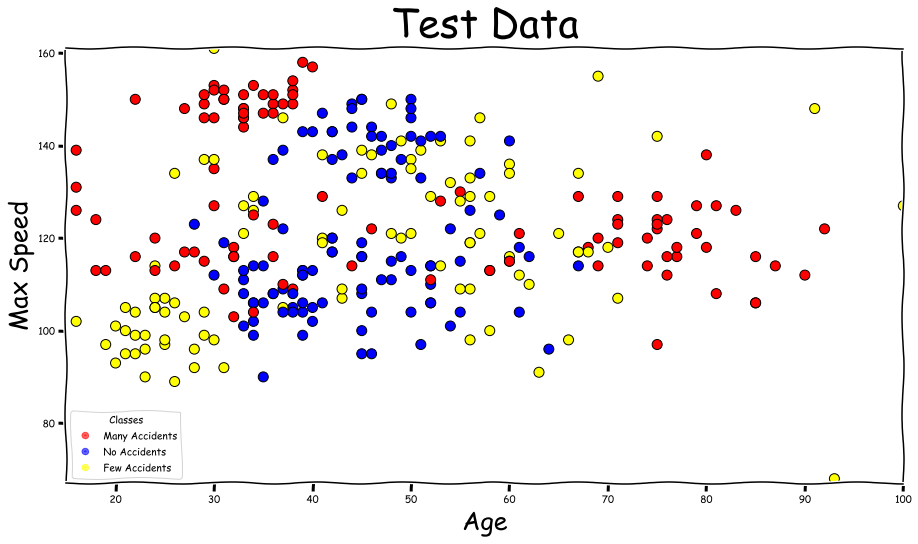

In [16]:
plotPrediction(None, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test, title="Test Data")

In [17]:
# clf = GaussianNB(priors=[0.33, 0.33, 0.34], var_smoothing=1e-03)
clf = GaussianNB()

clf.fit(X_train_2_dim, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
input = [[100.0, 48.0], [150.0, 78.0], [100.0, 18.0]]
clf.predict(input)

array([1, 0, 2], dtype=int64)

(<matplotlib.axes._subplots.AxesSubplot at 0x1eb2890f710>,
 <matplotlib.collections.PathCollection at 0x1eb28e144a8>)

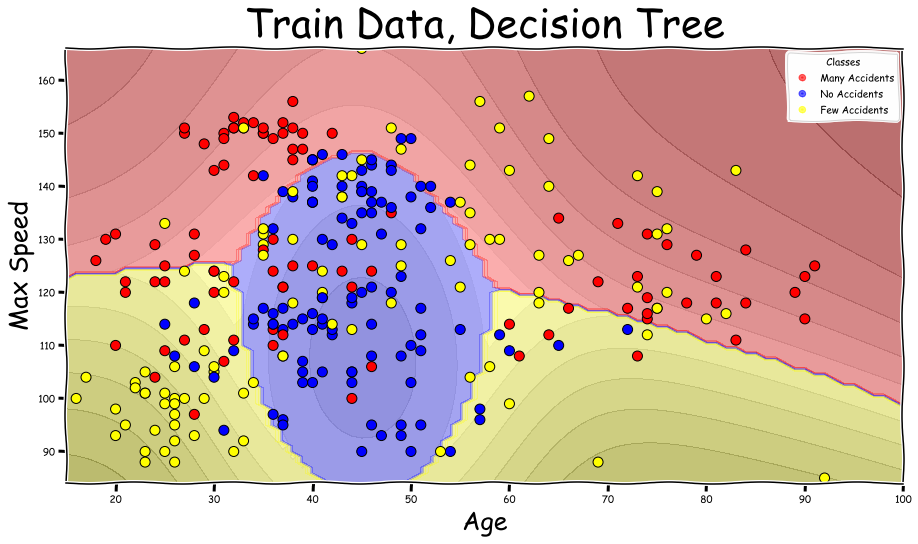

In [19]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Decision Tree")

In [20]:
clf.score(X_train_2_dim, y_train)

0.6083333333333333

(<matplotlib.axes._subplots.AxesSubplot at 0x1eb2896d978>,
 <matplotlib.collections.PathCollection at 0x1eb28e95390>)

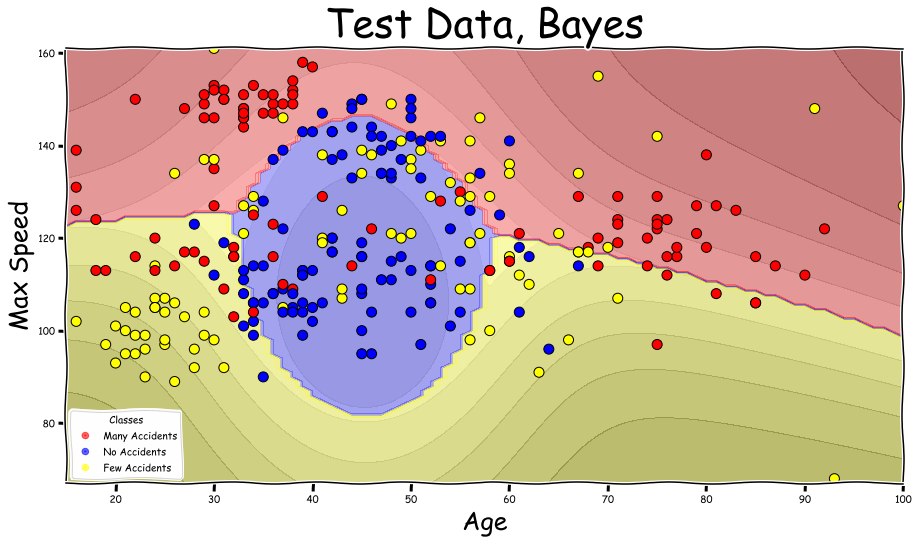

In [21]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Bayes")

In [22]:
clf.score(X_test_2_dim, y_test)

0.57